In [16]:
import netCDF4 as nc

In [277]:
ds = xr.open_dataset('local_folder/20200101010000-JPL-L2P_GHRSST-SSTskin-MODIS_A-N-v02.0-fv01.0.nc') 

threshold = 90  # Set your threshold value here
masked_array = np.ma.masked_greater(ds.lat, threshold)


print(masked_array)
# ds.sea_surface_temperature[0].plot(y='lat', x='lon') 

[[56.99998  57.000523 57.001015 ... 51.90671  51.886734 51.866875]
 [56.981827 56.982426 56.982967 ... 51.89088  51.871033 51.850967]
 [56.96367  56.964325 56.964924 ... 51.87518  51.85521  51.834995]
 ...
 [39.053078 39.05155  39.050014 ... 35.327827 35.314575 35.3012  ]
 [39.03499  39.033524 39.03204  ... 35.31077  35.297466 35.284042]
 [39.016903 39.01549  39.014065 ... 35.293705 35.280354 35.26688 ]]


56.99998


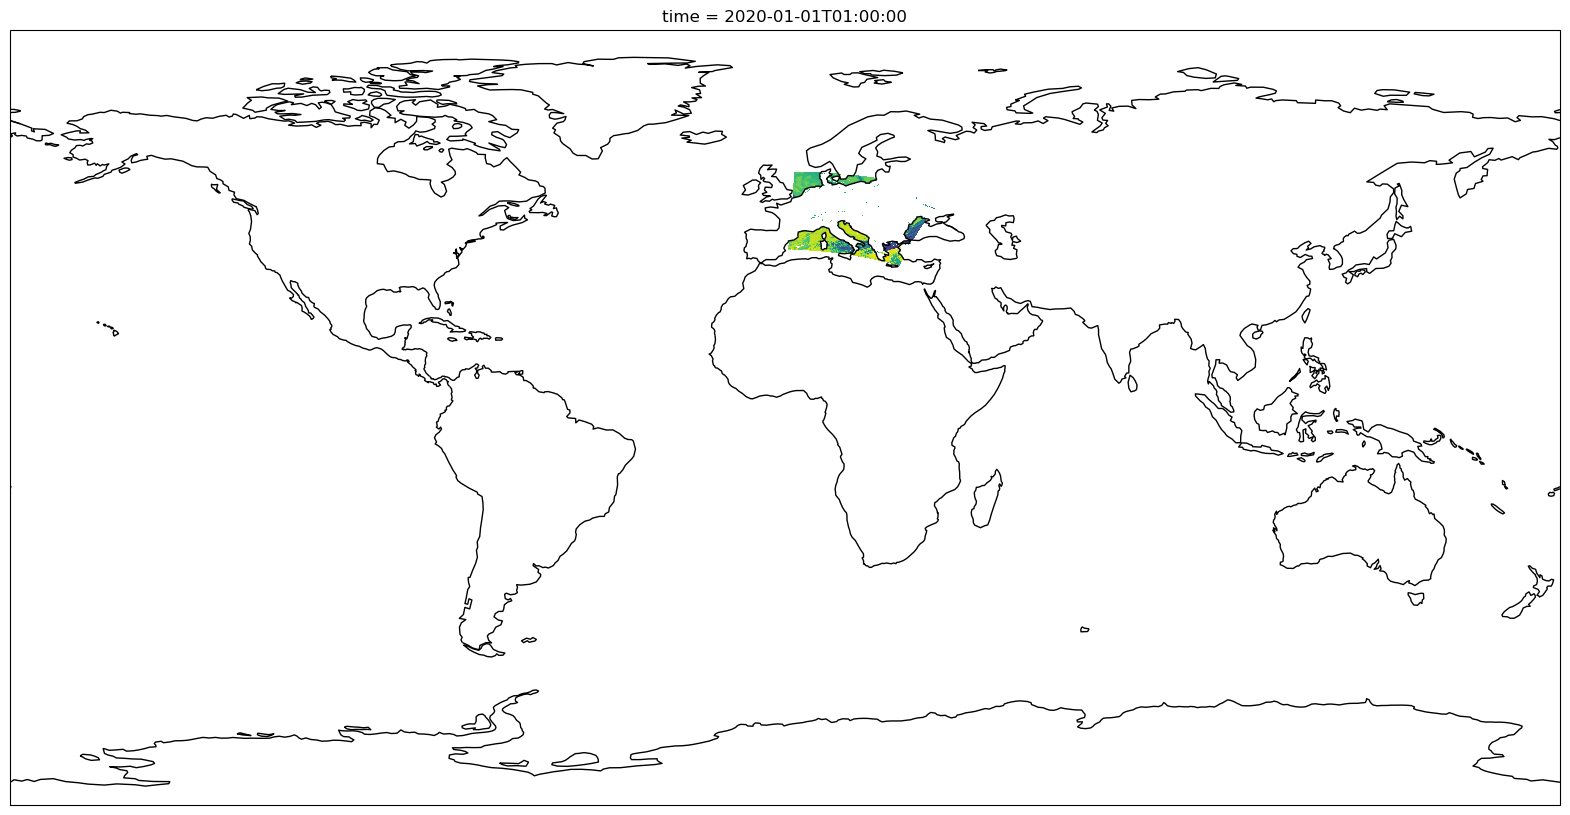

In [265]:
import cartopy.crs as ccrs

plt.figure(figsize=(20,24))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.sea_surface_temperature[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), y="lat", x="lon", add_colorbar=False
)
ax.coastlines()
print(ds.lat[0][0].values)

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

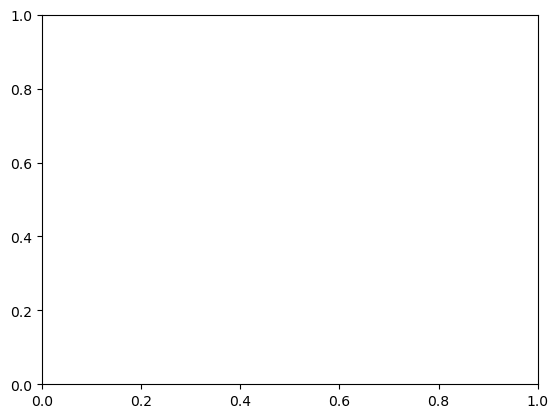

In [300]:
import numpy.ma as ma
ds = xr.open_dataset('local_folder/20230912095500-JPL-L2P_GHRSST-SSTskin-MODIS_A-D-v02.0-fv01.0.nc') 

# plt.contourf(masked_lat, masked_long, ds.sea_surface_temperature[0])  
# z = ds.sea_surface_temperature[0]
# ds.sea_surface_temperature[0].plot(x='lat', y='lon') 

In [305]:
# Assuming you have an xarray dataset named 'ds'
# Define the start and end rows you want to copy
start_row = 0  # Start row index (inclusive)
end_row = 2000    # End row index (inclusive)

# Specify the dimension along which you want to slice
dim_name = 'lat'

# Use .sel() to select the desired range of rows
selected_data = ds.sel({dim_name: slice(start_row, end_row)})

KeyError: "no index found for coordinate 'lat'"

In [ ]:
# ds.sea_surface_temperature[0].plot(x='lat', y='lon') 

ValueError: x and y arguments to pcolormesh cannot have non-finite values or be of type numpy.ma.core.MaskedArray with masked values

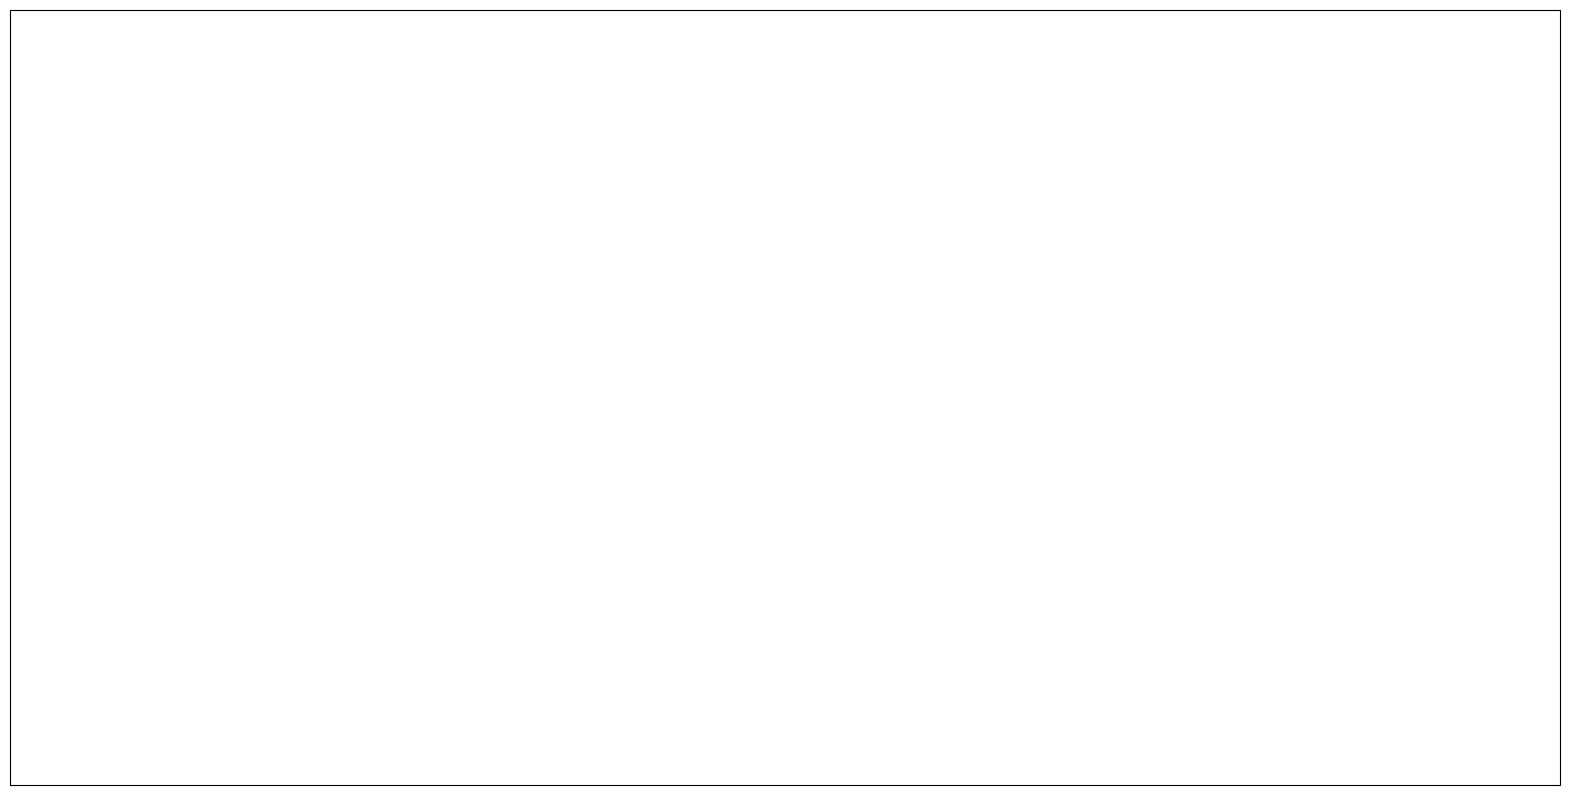

In [226]:
import cartopy.crs as ccrs

plt.figure(figsize=(20,24))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.sea_surface_temperature[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), y="lat", x="lon", add_colorbar=False
)
ax.coastlines()
# ds.save
# ax.set_ylim([0, 90]);